In [140]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
directory = 'data/sat_images/wild_est/'

In [142]:
batch_size = 32
img_size = 256

In [164]:
X_train = image_dataset_from_directory(
    directory, labels='inferred', class_names=None, # maybe need: label_mode='binary' and rename directories to 0 1
    color_mode='rgb', batch_size=12986, image_size=(img_size, img_size), shuffle=True, seed=42,
    validation_split=0.2, subset='training', interpolation='bilinear', follow_links=True
)
# this batch size is how it divides the data in the epochs below

Found 16232 files belonging to 2 classes.
Using 12986 files for training.


In [168]:
X_train[0]

TypeError: 'BatchDataset' object is not subscriptable

In [144]:
X_test = image_dataset_from_directory(
    directory, labels='inferred', class_names=None, # # maybe need: label_mode='binary' and rename directories to 0 1
    color_mode='rgb', batch_size=batch_size, image_size=(img_size, img_size), shuffle=True, seed=42,
    validation_split=0.2, subset='validation', interpolation='bilinear', follow_links=True
)

Found 16232 files belonging to 2 classes.
Using 3246 files for validation.


In [ ]:
# batch it after transformation with:
#batched_dataset = X_train.batch(32)

In [167]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [148]:
# from tensorflow.data.experimental import save

# # dataset = make_dataset()
# # def custom_shard_func(element):
# #   return 0
# # dataset = tf.data.experimental.save(
# #     path="/path/to/data", ..., shard_func=custom_shard_func)

# save(X_train, 'data/X_train', compression='GZIP', shard_func=None)

In [149]:
# save(X_test, 'data/X_test', compression='GZIP', shard_func=None)

In [152]:
# also need to specify this when loading:
thespec = X_train.element_spec

In [153]:
type(thespec)

tuple

In [156]:
blah = thespec[0]

In [157]:
type(blah)

tensorflow.python.framework.tensor_spec.TensorSpec

In [160]:
X_train.element_spec == X_test.element_spec

True

In [151]:
X_test.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [106]:
# try sobel?
from tensorflow.image import sobel_edges
from tensorflow import clip_by_value

In [169]:
X_train.class_names

['Established Campground', 'Wild Camping']

In [6]:
X_test.class_names

['Established Campground', 'Wild Camping']

In [170]:
image_batch, labels_batch = next(iter(X_train))

In [171]:
image_batch

<tf.Tensor: shape=(12986, 256, 256, 3), dtype=float32, numpy=
array([[[[ 45.46698 ,  57.46698 ,  46.201355],
         [ 30.548416,  43.99852 ,  34.098755],
         [ 38.068863,  45.938828,  38.330017],
         ...,
         [ 73.23212 ,  84.31189 ,  76.29683 ],
         [137.07039 , 146.15286 , 138.05174 ],
         [108.17207 , 119.655   , 111.655   ]],

        [[ 33.6073  ,  45.6073  ,  36.14032 ],
         [ 50.161865,  62.409286,  52.948425],
         [ 38.0943  ,  44.8098  ,  40.2641  ],
         ...,
         [ 56.109375,  66.30417 ,  58.131775],
         [122.03993 , 132.59071 , 123.68063 ],
         [115.936844, 126.42291 , 119.87302 ]],

        [[ 21.787842,  33.78784 ,  22.7901  ],
         [ 28.9729  ,  38.9505  ,  30.769775],
         [ 45.590332,  53.61725 ,  45.89154 ],
         ...,
         [ 73.25354 ,  85.24681 ,  73.85596 ],
         [120.1911  , 130.90881 , 122.81012 ],
         [150.2901  , 160.08472 , 156.04787 ]],

        ...,

        [[ 19.824738,  31.6321

In [172]:
image_batch_sobeled = sobel_edges(image_batch)
# maybe save these as images in new dir

Tensor holding edge maps for each channel. Returns a tensor with shape [batch_size, h, w, d, 2] where the last two dimensions hold [[dy[0], dx[0]], [dy[1], dx[1]], ..., [dy[d-1], dx[d-1]]] calculated using the Sobel filter.

In [107]:
def clip_0_1(image):
  return clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [173]:
image_batch_sobeled.shape

TensorShape([12986, 256, 256, 3, 2])

In [174]:
image_batch_sobeled[0].shape

TensorShape([256, 256, 3, 2])

In [176]:
fig, axs = plt.subplots(1,3, figsize=(10,10))
axs[0].imshow(clip_0_1(image_batch_sobeled[0][...,0]/4+0.5))
axs[1].imshow(clip_0_1(image_batch_sobeled[0][...,1]/4+0.5))
axs[2].imshow(image_batch[0].numpy().astype("uint8"))
axs[0].set_title('horizontal edges')
axs[1].set_title('vertical edges')
axs[2].set_title('original')

SyntaxError: invalid syntax (<ipython-input-176-edf31565689c>, line 2)

In [189]:
dir(X_train)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_de

In [191]:
#X_train_sobel = X_train.apply(dataset_fn)
# https://stackoverflow.com/questions/56740582/how-to-calculate-sobel-edge-detection-in-tensorflow

import tensorflow
def dataset_fn(ds):
    grad_components = sobel_edges(ds)
#     grad_mag_components = grad_components**2
#     grad_mag_square = tensorflow.math.reduce_sum(grad_mag_components,axis=-1) # sum all magnitude components
#     grad_mag_img = tensorflow.sqrt(grad_mag_square) # this is the image tensor you want
    return grad_components

X_train.map(dataset_fn)

# dataset = dataset.map(lambda x: x*2)
#list(dataset.as_numpy_iterator())

TypeError: in user code:


    TypeError: tf__dataset_fn() takes 1 positional argument but 2 were given


In [ ]:
# then batch it:
batched_dataset = X_train.batch(32)

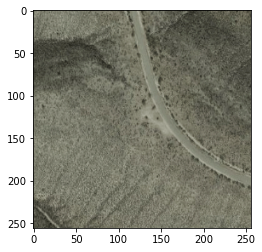

In [113]:
plt.imshow(image_batch[0].numpy().astype("uint8"))

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import data

In [ ]:
# # I don't think I need these, but just for reference:
# from skimage.transform import resize
# # if need to rescale
# img_shp_desired = (100, 100, 3)
# img_resized = resize(img_cropped_2, img_shp_desired, mode='constant')
# plt.imshow(img_resized)
# # if need to grayscale
# plt.imshow(img_hsv[:,:,0], cmap='gray');

In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [75]:
# set parameters
num_classes = 2
epochs = 2 # number of passes through the entire train dataset before weights "final"
AUTOTUNE = data.experimental.AUTOTUNE
# X_train = X_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# X_test = X_test.cache().prefetch(buffer_size=AUTOTUNE)
img_height = 256
img_width = 256
#input_shape = (img_rows, img_cols, 1)   # 1 channel image input (grayscale) KEEP
nb_filters = 16    # number of convolutional filters to use summarizes more
pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
#batch_size = 1000 # number of training samples used at a time to update the weights
# model.add(Dropout(0.5))  # zeros out some fraction of inputs (neurons), helps prevent overfitting

# add callback to save weights 
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback
# model callback
# reduce LR on plateau

# what about padding? below same uses padding if needed

# '''
# When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a 
# number of output units from the layer during the training process. Dropout takes a fractional 
# number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 
# 20% or 40% of the output units randomly from the applied layer.
# '''

In [81]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
    layers.Conv2D(nb_filters, 3, padding='same', activation='relu'), # was 16, 32, 64
    layers.MaxPooling2D(pool_size=pool_size),
    layers.Conv2D(nb_filters, 3, padding='same', activation='relu'), # drop layers.. for initial testing
    layers.MaxPooling2D(pool_size=pool_size),
    layers.Conv2D(nb_filters, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=pool_size),
    # insert more layers?
    # insert callback?
    layers.Flatten(),
    layers.Dense(256, activation='relu'), # activation='relu'
    #layers.Dropout(0.3),
    #layers.Dense(num_classes, activation='relu') # or sigmoid for binary? relu?
    layers.Dense(1, activation='sigmoid') # or sigmoid for binary? relu?
])

In [82]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
              # if multiclass then use this:
              #loss = keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics = ['accuracy'])

In [83]:
# check model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 32, 32, 32)      

In [84]:
# run it
# try more epochs (maybe 1000.. at least 100)
history = model.fit(
            X_train,
            validation_data = X_test,
            epochs = epochs,
            #batch_size=batch_size,
            verbose = 1
) # weighted_metrics

Epoch 1/2
406/406 [==============================] - 444s 1s/step - loss: 0.6521 - accuracy: 0.6536 - val_loss: 0.6060 - val_accuracy: 0.7144
Epoch 2/2
406/406 [==============================] - 495s 1s/step - loss: 0.5556 - accuracy: 0.7241 - val_loss: 0.5555 - val_accuracy: 0.7344


In [85]:
score = model.evaluate(X_test, verbose=1) # diff that model.predict ? yes.. just gets scores will predict will return classes
print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

102/102 [==============================] - 51s 503ms/step - loss: 0.5555 - accuracy: 0.7344
Test score: 0.5555156469345093
Test accuracy: 0.734442412853241


In [86]:
predictions = model.predict(X_test, verbose=1)

102/102 [==============================] - 48s 472ms/step


In [87]:
predictions.shape

(3246, 1)

In [88]:
predictions.min()

0.0016230643

In [89]:
predictions.max()

0.88822687

In [90]:
predictions[1000:1100,:]

array([[0.6722532 ],
       [0.6050503 ],
       [0.43888563],
       [0.19882956],
       [0.47917396],
       [0.7379529 ],
       [0.67509705],
       [0.4247958 ],
       [0.20129296],
       [0.61510694],
       [0.64871395],
       [0.81741226],
       [0.19250637],
       [0.67350525],
       [0.76219815],
       [0.6874801 ],
       [0.62052864],
       [0.71057016],
       [0.70556074],
       [0.83287954],
       [0.7130101 ],
       [0.7768239 ],
       [0.38085198],
       [0.6777659 ],
       [0.3881136 ],
       [0.41484576],
       [0.78182995],
       [0.32505476],
       [0.80556357],
       [0.78794706],
       [0.55810106],
       [0.4303198 ],
       [0.63347596],
       [0.4807983 ],
       [0.24380499],
       [0.72324955],
       [0.2752599 ],
       [0.6481939 ],
       [0.1414347 ],
       [0.6569437 ],
       [0.6149409 ],
       [0.5245405 ],
       [0.82091296],
       [0.6848963 ],
       [0.79818666],
       [0.5852078 ],
       [0.75445247],
       [0.708

In [91]:
predictions_df = pd.DataFrame(predictions, columns=X_test.class_names)

ValueError: Shape of passed values is (3246, 1), indices imply (3246, 2)

In [94]:
predictions_df.describe()

,Eco-Friendly,Informal Campsite,Short-term Parking,Showers,Water,Wild Camping
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000
mean,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
25%,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
50%,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
75%,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541
max,-0.394905,0.237534,-0.536505,-0.439493,-0.545223,0.610541


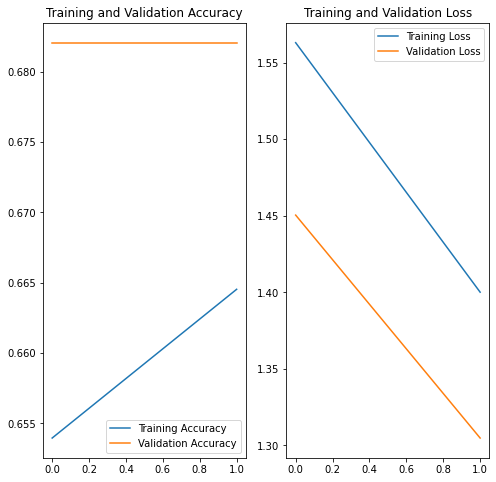

In [82]:
# plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def compute_plot_confusion_matrix(y_true_class, y_pred_class, classes):

    confmat = confusion_matrix(y_true_class, y_pred_class, labels=range(N_CLASSES))
    confmat = confmat / confmat.sum(0).astype(float)
    df_cm = pd.DataFrame(confmat, index = [split_str(c) for c in classes],
                          columns = [split_str(c) for c in classes])

    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
    plt.figure(figsize = (12,10))
    sns.heatmap(df_cm, annot=True, fmt=".2f")
    
    return confmat

In [135]:
# get y_test out of tf dataset
y_test_labels = []
#https://stackoverflow.com/questions/56226621/how-to-extract-data-labels-back-from-tensorflow-dataset
for images, labels in X_test.take(1):  # only take first element of dataset
    #numpy_images = images.numpy()
    y_test_labels.append(labels.numpy())

In [138]:
# since my data is batched
y = np.concatenate([y for x, y in X_test], axis=0)

In [139]:
type(y)

numpy.ndarray

In [140]:
y.shape

(4746, 6)

In [141]:
y

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# only works for binary
predictions_raveled = predictions.ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(y, predictions_raveled)

In [147]:
classes = len(X_test.class_names)

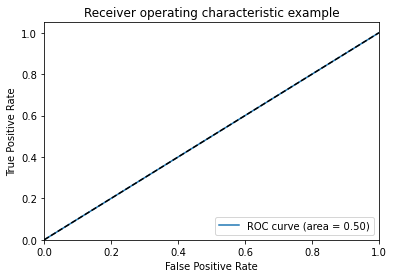

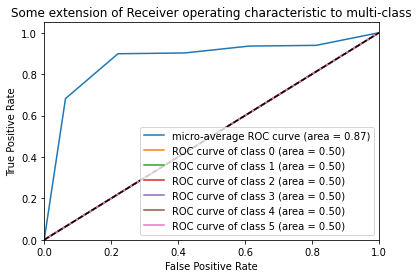

In [157]:
# https://scikit-learn.org/0.15/auto_examples/plot_roc.html#:~:text=ROC%20curves%20are%20typically%20used,necessary%20to%20binarize%20the%20output.
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y[:, i], predictions[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y.ravel(), predictions.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

ValueError: Sequential should be a binary classifier

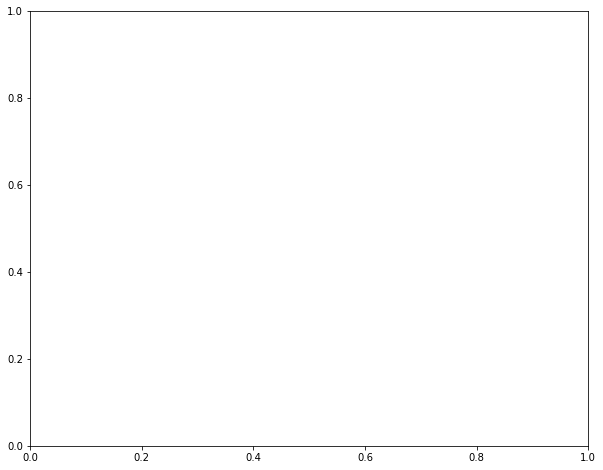

In [122]:
from sklearn import metrics
fig, ax = plt.subplots(1, figsize=(10, 8))
metrics.plot_roc_curve(model, X_test, predictions, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.show()

In [ ]:
def create_roc_curve(X_train, X_test, y_train, y_test, estimator, ax):
    #fig, ax = plt.subplots()
    for i in estimator:
        clf = i.fit(X_train, y_train)
        metrics.plot_roc_curve(i, X_test, y_test, ax=ax)
    #plt.legend() #or would this be ax.legend?
    #plt.show()
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    return ax
    # return roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

In [ ]:
lst = [rf, dt, gdb]
create_roc_curve(X_train, X_test, y_train_ravel, y_test, lst, ax)

In [ ]:
# edit this function for improvements and track model progress
def define_model(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('tanh'))

    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model2 = define_model(nb_filters, kernel_size, input_shape, pool_size)

In [ ]:
# augmentation?
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)